### Bibliotecas

In [18]:
import numpy as np
from random import sample, randint
import copy
import random
import math
import pandas as pd
from random import choice
import statistics
import time
import matplotlib.pyplot as plt

### Ler CS

In [4]:
bucket = 'sudoku-lucas-cruvinel'
data_key = 'sudoku.csv'
data_location = f's3://{bucket}/{data_key}'

df = pd.read_csv(data_location)
df

,quizzes,solutions
0,0043002090050090010700600430060020871900074000...,8643712593258497619712658434361925871986574322...
1,0401000501070039605200080000000000170009068008...,3461792581875239645296483719658324174729168358...
2,6001203840084590720000060050002640300700800069...,6951273841384596727248369158512647392739815469...
3,4972000001004000050000160986203000403009000000...,4972583161864397252537164986293815473759641828...
4,0059103080094030600275001000300002010008200070...,4659123781894735623275681497386452919548216372...
...,...,...
999995,3000280000290000300054001077402030980086070031...,3175289464291768356854391277462135989586472131...
999996,0030006000040860057000009409350407208067200502...,5234976811942863757685139429356417288167294532...
999997,0003508200618040300500090000700600029030070100...,7493568212618745393582197468749613529235876146...
999998,0702006900030400010000650205600300000947005800...,4752816936239478511893657245628341793947165828...


### Funcoes e configurações

In [5]:
def lin_to_np(lin):
  array = np.array([int(i) for i in lin], dtype=np.int8)
  array = np.reshape(array, (9,9))
  return array

In [6]:
print(lin_to_np(df['quizzes'][0]))
print(lin_to_np(df['solutions'][0]))

[[0 0 4 3 0 0 2 0 9]
 [0 0 5 0 0 9 0 0 1]
 [0 7 0 0 6 0 0 4 3]
 [0 0 6 0 0 2 0 8 7]
 [1 9 0 0 0 7 4 0 0]
 [0 5 0 0 8 3 0 0 0]
 [6 0 0 0 0 0 1 0 5]
 [0 0 3 5 0 8 6 9 0]
 [0 4 2 9 1 0 3 0 0]]
[[8 6 4 3 7 1 2 5 9]
 [3 2 5 8 4 9 7 6 1]
 [9 7 1 2 6 5 8 4 3]
 [4 3 6 1 9 2 5 8 7]
 [1 9 8 6 5 7 4 3 2]
 [2 5 7 4 8 3 9 1 6]
 [6 8 9 7 3 4 1 2 5]
 [7 1 3 5 2 8 6 9 4]
 [5 4 2 9 1 6 3 7 8]]


### Algoritmo de força bruta

In [7]:
### Forca Bruta
def is_valid(board, row, col, num):
    # Verifica se 'num' já está na linha
    if num in board[row]:
        return False

    # Verifica se 'num' já está na coluna
    if num in [board[i][col] for i in range(9)]:
        return False

    # Verifica se 'num' já está no bloco 3x3
    start_row, start_col = 3 * (row // 3), 3 * (col // 3)
    for i in range(3):
        for j in range(3):
            if board[start_row + i][start_col + j] == num:
                return False

    return True

def solve_sudoku(board):
    for row in range(9):
        for col in range(9):
            if board[row][col] == 0:
                for num in range(1, 10):
                    if is_valid(board, row, col, num):
                        board[row][col] = num
                        if solve_sudoku(board):
                            return True
                        board[row][col] = 0  # Reverta a célula se a solução não for encontrada
                return False
    return True

# def print_sudoku(board):
#     output = ''
#     for row in board:
#         output += ' '.join(map(str, row)) + '\n'
#     print(output)

In [8]:
entrada_fb = lin_to_np(df['quizzes'][0])
inicio = time.time()  # Registra o tempo de início
solve_sudoku(entrada_fb)
tempo_total = time.time() - inicio
print("Tempo:")
print(tempo_total)
print("Resultado gerado:")
print(entrada_fb)
print("Resposta BD:")
print(lin_to_np(df['solutions'][0]))
print("Iguais:")
print(np.array_equal(entrada_fb, lin_to_np(df['solutions'][0])))

Tempo:
0.047400712966918945
Resultado gerado:
[[8 6 4 3 7 1 2 5 9]
 [3 2 5 8 4 9 7 6 1]
 [9 7 1 2 6 5 8 4 3]
 [4 3 6 1 9 2 5 8 7]
 [1 9 8 6 5 7 4 3 2]
 [2 5 7 4 8 3 9 1 6]
 [6 8 9 7 3 4 1 2 5]
 [7 1 3 5 2 8 6 9 4]
 [5 4 2 9 1 6 3 7 8]]
Resposta BD:
[[8 6 4 3 7 1 2 5 9]
 [3 2 5 8 4 9 7 6 1]
 [9 7 1 2 6 5 8 4 3]
 [4 3 6 1 9 2 5 8 7]
 [1 9 8 6 5 7 4 3 2]
 [2 5 7 4 8 3 9 1 6]
 [6 8 9 7 3 4 1 2 5]
 [7 1 3 5 2 8 6 9 4]
 [5 4 2 9 1 6 3 7 8]]
Iguais:
True


### Recozimento Simulado

In [11]:
import numpy as np
from random import sample, randint
import copy

TEMP = 0.5


def sudoku_ann(puzzle_input,maxIterations=5000000,T=TEMP,resfriamento_cof=1.0 - 1e-5,verbose=False):
    """
    Preenche de forma única cada bloco nxn em um quebra-cabeça de n^2xn^2 de maneira aleatória.
    Conta o número de elementos únicos em cada linha e coluna, atribuindo uma pontuação de -1 para cada elemento único.
    Escolhe aleatoriamente um quadrado nxn no quebra-cabeça e troca duas entradas nele para calcular um "estado vizinho".
    Calcula a pontuação para o estado vizinho e aceita/rejeita com uma certa probabilidade de que o novo estado tenha uma pontuação mais baixa.
    Reduz a temperatura por meio de uma taxa de resfriamento (T = 0,99999T).
    Repete a partir do passo 2 até que a pontuação mínima seja alcançada.
    """
    reheat_rate = T/0.3

    sudoku = copy.deepcopy(puzzle_input)
    tam = len(sudoku)
    tam_total = int(np.sqrt(tam))

    lugares_vazios = inicializar(sudoku)


    #Inicio iteracoes
    score = calc_custos(sudoku)
    target_score = -2*tam*tam
    best_score = score
    stuck_count=0

    for i in range(maxIterations):
        if(i%10000 ==0 and verbose):
            print("Iteration "+str(i)+", current score:"+str(score)+"  Best score: "+str(best_score))

        # Ajustar temperatura
        if(score == target_score or T==0):
            break

        #Se ficar preso, pode reesquentar um pouco
        if(stuck_count>5000 or T < 1e-4):
            print("Annealer is stuck at T={} and stuck_count={}, so re-initializing...".format(T,stuck_count))
            T=T*reheat_rate
            sudoku=copy.deepcopy(puzzle_input)
            lugares_vazios = inicializar(sudoku)
            stuck_count=0


        neighbor_puzzle = get_vizinho(sudoku,lugares_vazios) # Encontra estado vizinhos
        s2 = calc_custos(neighbor_puzzle) # Pega a funcao custo do vizinho
        delta_s = float(score-s2) # Calcula a diferenca
        probability = np.exp(delta_s/T) # Escolhe o quao provavel de aceitar o novo estado

        random_probability = np.random.uniform(low=0,high=1,size=1)

        if(probability > random_probability): # Aplica a probabilidade
            sudoku = copy.deepcopy(neighbor_puzzle)
            score = s2
            if(score<best_score):
                best_score=score
            stuck_count=0

        stuck_count+=1

        T=resfriamento_cof*T

    return sudoku


def descobrir_vazios(lugares_vazios,dim,sqcont):
    vazios = []

    for row in range(dim):
        for col in lugares_vazios[row]:
            r= row + dim*(sqcont//dim)
            c= col + dim*(sqcont%dim)
            vazios.append((r,c))
    return vazios


def inicializar(sudoku):
    tam = len(sudoku)
    tam_total = int(np.sqrt(tam))
    i, j = 0, 0
    lugares_vazios=[]
    temp_list=[]
    temp_cont=0
    while(i<tam and j<tam):
        temp_list.append(sudoku[i][j:j+tam_total])

        if ((i+1)%tam_total == 0 and (j+tam_total)%tam_total == 0):
            mudados=[]
            vazios=[]
            values=list(range(1,tam+1))
            
            #Encontra as celulas vazias e as que já vieram
            for row in range(tam_total):
                vazios.append(np.where(np.array(temp_list)[row]==0)[0].tolist())
                mudados.append(np.where(np.array(temp_list)[row]!=0)[0].tolist())

                # tira dos temporarios os ja encontrados
                for f in mudados[row]:
                    values.remove(temp_list[row][f])

            # Mapeia as celulas vazias para os indices
            index_map = descobrir_vazios(vazios,tam_total,temp_cont)
            lugares_vazios.append(index_map)

            # Enche o sudoku com valores nao iguais 
            for cell in index_map:

                random_val=sample(values,1)[0]

                sudoku[cell[0]][cell[1]] = random_val

                values.remove(random_val)

            temp_cont+=1
            j+=tam_total
            i-=tam_total
            temp_list=[]
            if(j%tam==0):
                i=i+tam_total
                j=0

        i+=1

    return lugares_vazios



def calc_custos(sudoku):
    tam = len(sudoku)
    score = 0

    # Contador
    sudoku_trans =  list(zip(*sudoku))
    for i in range(tam):

        # Calcula o score para cara elemento unico
        score -= len(list(set(sudoku[i])))
        score -= len(list(set(sudoku_trans[i])))

    return score



def get_vizinho(sudoku,lugares_vazios):
    tam = len(sudoku)
    tam_total = int(np.sqrt(tam))
    novo_sudoku = copy.deepcopy(sudoku)

    random_pedaco=0
    while(random_pedaco<2 ):
        #Escolhe um bloco aleatoriamente
        block = randint(0,tam-1)
        random_pedaco = len(lugares_vazios[block])

    # Escolhe dois elementos aleatoriamente
    x, y = sample(range(len(lugares_vazios[block])),2)
    b1, b2 = lugares_vazios[block][x], lugares_vazios[block][y]

    # Inverte-os
    novo_sudoku[b1[0]][b1[1]], novo_sudoku[b2[0]][b2[1]] = novo_sudoku[b2[0]][b2[1]], novo_sudoku[b1[0]][b1[1]]

    return novo_sudoku

In [12]:
entrada_ann = lin_to_np(df['quizzes'][0])
inicio = time.time()  # Registra o tempo de início
solution = sudoku_ann(entrada_ann)
tempo_total = time.time() - inicio
print("Tempo:")
print(tempo_total)
print("Resultado gerado:")
print(solution)
print("Resposta BD:")
print(lin_to_np(df['solutions'][0]))
print("Iguais:")
print(np.array_equal(solution, lin_to_np(df['solutions'][0])))

Tempo:
0.13979053497314453
Resultado gerado:
[[8 6 4 3 7 1 2 5 9]
 [3 2 5 8 4 9 7 6 1]
 [9 7 1 2 6 5 8 4 3]
 [4 3 6 1 9 2 5 8 7]
 [1 9 8 6 5 7 4 3 2]
 [2 5 7 4 8 3 9 1 6]
 [6 8 9 7 3 4 1 2 5]
 [7 1 3 5 2 8 6 9 4]
 [5 4 2 9 1 6 3 7 8]]
Resposta BD:
[[8 6 4 3 7 1 2 5 9]
 [3 2 5 8 4 9 7 6 1]
 [9 7 1 2 6 5 8 4 3]
 [4 3 6 1 9 2 5 8 7]
 [1 9 8 6 5 7 4 3 2]
 [2 5 7 4 8 3 9 1 6]
 [6 8 9 7 3 4 1 2 5]
 [7 1 3 5 2 8 6 9 4]
 [5 4 2 9 1 6 3 7 8]]
Iguais:
True


### Comparação

In [37]:
amostra = np.random.choice(df.shape[0], size=500, replace=False)
amostra

array([770668, 114428, 121356, 118609, 102532,  69927, 593113, 223254,
       737318, 961277, 462439, 204809, 412816, 950432, 502232, 530238,
       400980, 988398, 184166, 318544, 422029, 372519, 399013, 949563,
       326871, 931982, 708642, 412705, 857129, 518616, 853347, 327761,
        84923, 284749, 597428, 193586, 704759, 824473,  94404, 610652,
       517984, 694661, 715592, 154091, 577926, 289918, 549026,  35060,
       543698,  61217, 710277, 432570, 167042, 222803, 791730, 640943,
       660991, 681459, 938751, 980632, 936949, 931560, 794912, 855530,
       424345, 952095, 439187, 415635, 633560, 853171, 345894, 946255,
       758370, 616844, 954593, 326209, 354866, 129029, 325164,  55951,
        10583, 161983, 184711, 412659, 939630, 130159, 779853, 304117,
       306091, 972081,  52867,  58821, 175582,  97332, 405084, 563139,
         9689, 826560, 899588, 291254, 348596, 825535, 944789, 510030,
       205017, 415524, 825494, 815054, 814779, 541013, 148982,  10359,
      

In [38]:
data = pd.DataFrame(columns=['indice', 'fb_tempo', 'fb_acerto', 'ann_tempo', 'ann_acerto'])
for indc in amostra:
    entrada_fb = lin_to_np(df['quizzes'][indc])
    inicio = time.time()
    solve_sudoku(entrada_fb)
    tempo_total_fb = time.time() - inicio
    
    entrada_ann = lin_to_np(df['quizzes'][indc])
    inicio = time.time()
    solution = sudoku_ann(entrada_ann)
    tempo_total_ann = time.time() - inicio


    linha = {
        'indice': indc,
        'fb_tempo': tempo_total_fb,
        'fb_acerto': np.array_equal(entrada_fb, lin_to_np(df['solutions'][indc])),
        'ann_tempo': tempo_total_ann,
        'ann_acerto': np.array_equal(solution, lin_to_np(df['solutions'][indc]))
    }
    data = pd.concat([data, pd.DataFrame(linha, index=[0])], ignore_index=True)
    


In [39]:
data

,indice,fb_tempo,fb_acerto,ann_tempo,ann_acerto
0,770668,0.022919,True,0.098277,True
1,114428,0.020581,True,0.313264,True
2,121356,0.015628,True,0.184881,True
3,118609,0.013904,True,0.197158,True
4,102532,0.009011,True,0.070555,True
...,...,...,...,...,...
495,143616,0.016772,True,0.167503,True
496,205602,0.037553,True,0.126742,True
497,641390,0.041579,True,0.173451,True
498,142462,0.009849,True,0.235086,True


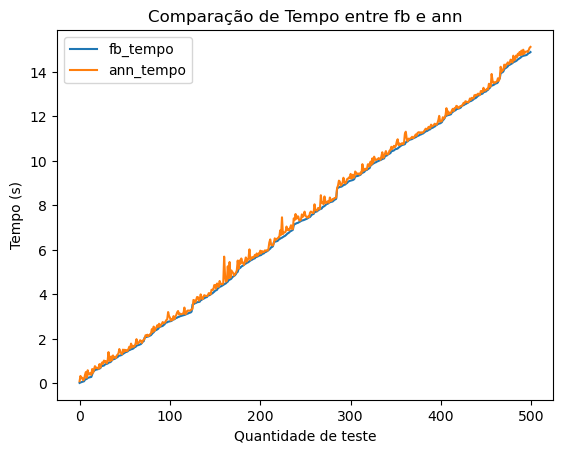

In [40]:
tempo_fb = []
tempo_ann = []
for index, row in data.iterrows():
    if index == 0:
        tempo_fb.append(row["fb_tempo"])
        tempo_ann.append(row["ann_tempo"])
    else:
        tempo_fb.append(row["fb_tempo"]+tempo_fb[index-1])
        tempo_ann.append(row["ann_tempo"]+tempo_fb[index-1])

plt.plot(tempo_fb, label='fb_tempo')
plt.plot(tempo_ann, label='ann_tempo')
plt.xlabel('Quantidade de teste')
plt.ylabel('Tempo (s)')
plt.title('Comparação de Tempo entre fb e ann')
plt.legend()
plt.show()

In [41]:
acerto_fb = data['fb_acerto'].sum() / len(data)
acerto_ann = data['ann_acerto'].sum() / len(data)

In [42]:
print(f"Taxa de acertos da força bruta: {acerto_fb*100:.2f}")
print(f"Taxa de acertos do recozimento simulado: {acerto_ann*100:.2f}")

Taxa de acertos da força bruta: 100.00
Taxa de acertos do recozimento simulado: 100.00
